In [1]:
#importer les packages nécessaires
import pandas as pd
import numpy as np

#les packages de visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#importer les packages de préparation de données
from sklearn.preprocessing import StandardScaler

#importer les packages de clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
#importer les données
df = pd.read_csv('dataset-90380.csv')
df

Murder  Assault  UrbanPop  Rape
Alabama           13.2      236        58  21.2
Alaska            10.0      263        48  44.5
Arizona            8.1      294        80  31.0
Arkansas           8.8      190        50  19.5
California         9.0      276        91  40.6
Colorado           7.9      204        78  38.7
Connecticut        3.3      110        77  11.1
Delaware           5.9      238        72  15.8
Florida           15.4      335        80  31.9
Georgia           17.4      211        60  25.8
Hawaii             5.3       46        83  20.2
Idaho              2.6      120        54  14.2
Illinois          10.4      249        83  24.0
Indiana            7.2      113        65  21.0
Iowa               2.2       56        57  11.3
Kansas             6.0      115        66  18.0
Kentucky           9.7      109        52  16.3
Louisiana         15.4      249        66  22.2
Maine              2.1       83        51   7.8
Maryland          11.3      300        67  27.8
Massachusetts      4.4      149        85  16.3
Michigan          12.1      255        74  35.1
Minnesota          2.7       72        66  14.9
Mississippi       16.1      259        44  17.1
Missouri           9.0      178        70  28.2
Montana            6.0      109        53  16.4
Nebraska           4.3      102        62  16.5
Nevada            12.2      252        81  46.0
New Hampshire      2.1       57        56   9.5
New Jersey         7.4      159        89  18.8
New Mexico        11.4      285        70  32.1
New York          11.1      254        86  26.1
North Carolina    13.0      337        45  16.1
North Dakota       0.8       45        44   7.3
Ohio               7.3      120        75  21.4
Oklahoma           6.6      151        68  20.0
Oregon             4.9      159        67  29.3
Pennsylvania       6.3      106        72  14.9
Rhode Island       3.4      174        87   8.3
South Carolina    14.4      279        48  22.5
South Dakota       3.8       86        45  12.8
Tennessee         13.2      188        59  26.9
Texas             12.7      201        80  25.5
Utah               3.2      120        80  22.9
Vermont            2.2       48        32  11.2
Virginia           8.5      156        63  20.7
Washington         4.0      145        73  26.2
West Virginia      5.7       81        39   9.3
Wisconsin          2.6       53        66  10.8
Wyoming            6.8      161        60  15.6

Visualisation des relations entre les différentes variables

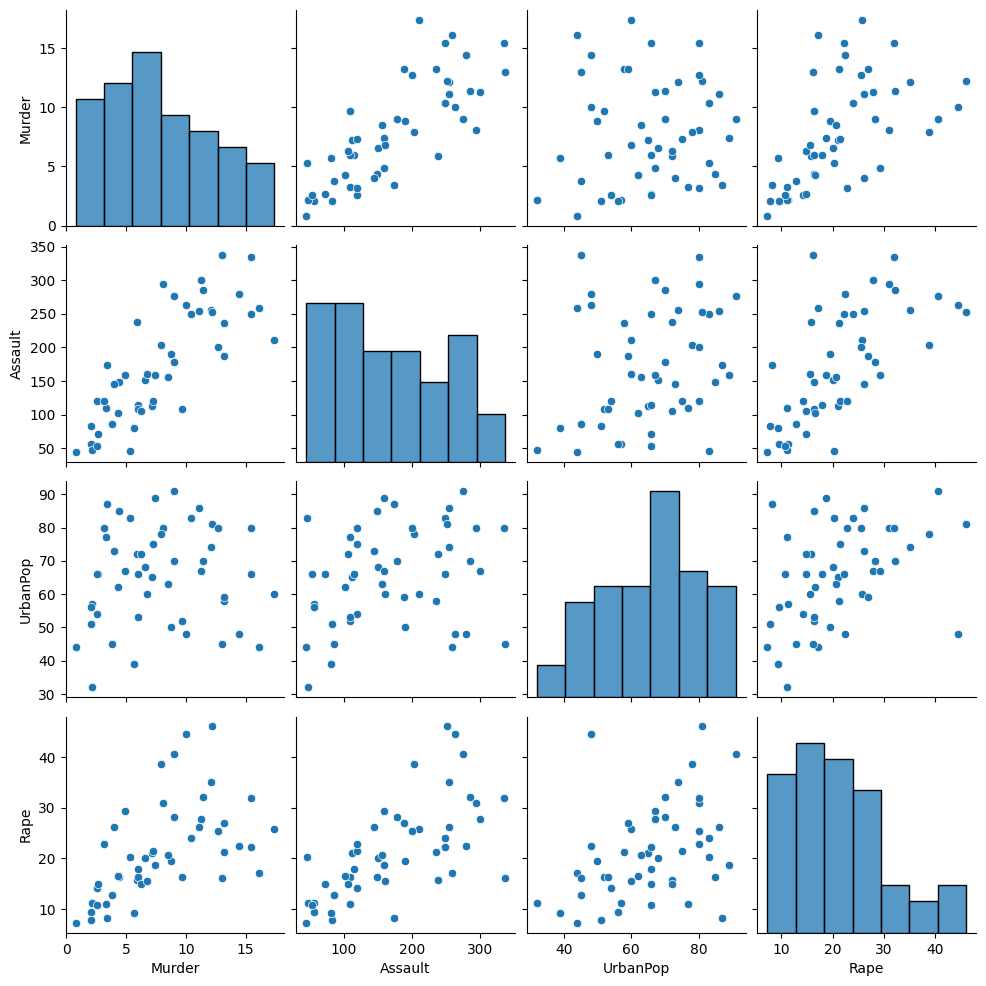

In [3]:
sns.pairplot(df)

In [4]:
#centrer et reduire nos données
scaler = StandardScaler()
x_scaled = scaler.fit_transform(df)
x_scaled

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

## Appliquer Kmeans

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.1

In [6]:
wcss

[200.0,
 104.96163315756871,
 80.08569526137276,
 57.55425863091105,
 50.50727764020435,
 44.56379442778554,
 39.98128650756617,
 34.879440942056874,
 32.565134498016604,
 27.91245357109004]

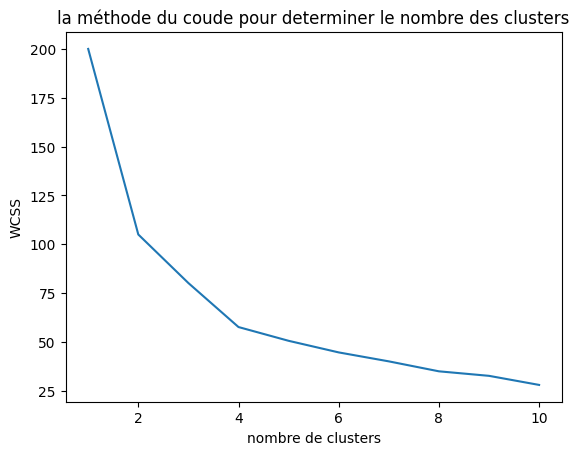

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('la méthode du coude pour determiner le nombre des clusters')
plt.xlabel('nombre de clusters')
plt.ylabel('WCSS')
plt.show()

In [8]:
kmeans_etats = KMeans(n_clusters=4, init = 'k-means++')

In [9]:
kmeans_etats.fit(x_scaled)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4)

In [10]:
clusters = kmeans_etats.predict(x_scaled)

In [11]:
df['cluster']=clusters
df1 = df.copy()
df

Murder  Assault  UrbanPop  Rape  cluster
Alabama           13.2      236        58  21.2        2
Alaska            10.0      263        48  44.5        0
Arizona            8.1      294        80  31.0        0
Arkansas           8.8      190        50  19.5        2
California         9.0      276        91  40.6        0
Colorado           7.9      204        78  38.7        0
Connecticut        3.3      110        77  11.1        3
Delaware           5.9      238        72  15.8        3
Florida           15.4      335        80  31.9        0
Georgia           17.4      211        60  25.8        2
Hawaii             5.3       46        83  20.2        3
Idaho              2.6      120        54  14.2        1
Illinois          10.4      249        83  24.0        0
Indiana            7.2      113        65  21.0        3
Iowa               2.2       56        57  11.3        1
Kansas             6.0      115        66  18.0        3
Kentucky           9.7      109        52  16.3        1
Louisiana         15.4      249        66  22.2        2
Maine              2.1       83        51   7.8        1
Maryland          11.3      300        67  27.8        0
Massachusetts      4.4      149        85  16.3        3
Michigan          12.1      255        74  35.1        0
Minnesota          2.7       72        66  14.9        1
Mississippi       16.1      259        44  17.1        2
Missouri           9.0      178        70  28.2        0
Montana            6.0      109        53  16.4        1
Nebraska           4.3      102        62  16.5        1
Nevada            12.2      252        81  46.0        0
New Hampshire      2.1       57        56   9.5        1
New Jersey         7.4      159        89  18.8        3
New Mexico        11.4      285        70  32.1        0
New York          11.1      254        86  26.1        0
North Carolina    13.0      337        45  16.1        2
North Dakota       0.8       45        44   7.3        1
Ohio               7.3      120        75  21.4        3
Oklahoma           6.6      151        68  20.0        3
Oregon             4.9      159        67  29.3        3
Pennsylvania       6.3      106        72  14.9        3
Rhode Island       3.4      174        87   8.3        3
South Carolina    14.4      279        48  22.5        2
South Dakota       3.8       86        45  12.8        1
Tennessee         13.2      188        59  26.9        2
Texas             12.7      201        80  25.5        0
Utah               3.2      120        80  22.9        3
Vermont            2.2       48        32  11.2        1
Virginia           8.5      156        63  20.7        3
Washington         4.0      145        73  26.2        3
West Virginia      5.7       81        39   9.3        1
Wisconsin          2.6       53        66  10.8        1
Wyoming            6.8      161        60  15.6        3

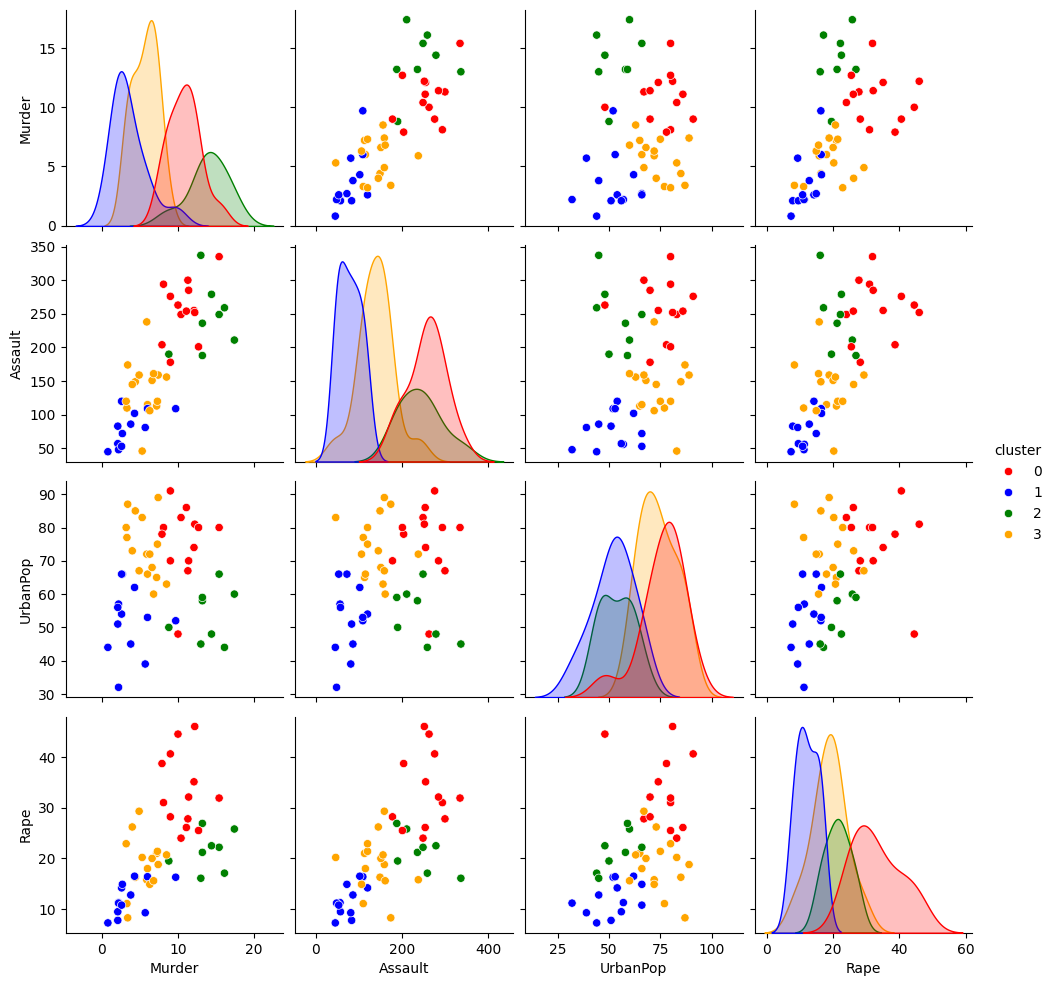

In [12]:
palette = "husl"  

palette = ["red", "blue", "green", "orange"]

# Créez le pairplot avec la palette spécifiée
p = sns.pairplot(df, hue='cluster', palette=palette)

In [13]:
df_clusters = df.groupby(['cluster']).median().round(0)
    
df_clusters

Murder  Assault  UrbanPop  Rape
cluster                                 
0          11.0    255.0      80.0  32.0
1           3.0     81.0      53.0  11.0
2          14.0    242.0      54.0  22.0
3           6.0    147.0      72.0  19.0

In [14]:
for i in range(4):
    print(f'Cluster {i}')
    print(df[df.cluster == i].index.tolist())
    print()

Cluster 0
['Alaska', 'Arizona', 'California', 'Colorado', 'Florida', 'Illinois', 'Maryland', 'Michigan', 'Missouri', 'Nevada', 'New Mexico', 'New York', 'Texas']

Cluster 1
['Idaho', 'Iowa', 'Kentucky', 'Maine', 'Minnesota', 'Montana', 'Nebraska', 'New Hampshire', 'North Dakota', 'South Dakota', 'Vermont', 'West Virginia', 'Wisconsin']

Cluster 2
['Alabama', 'Arkansas', 'Georgia', 'Louisiana', 'Mississippi', 'North Carolina', 'South Carolina', 'Tennessee']

Cluster 3
['Connecticut', 'Delaware', 'Hawaii', 'Indiana', 'Kansas', 'Massachusetts', 'New Jersey', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'Utah', 'Virginia', 'Washington', 'Wyoming']



## Utiliser l'ACP pour visualiser les données

In [15]:
# fonction pour afficher les composantes principales
def display_scree_plot(pca):
    scree = pca.explained_variance_ratio_*100
    plt.bar(np.arange(len(scree))+1, scree)
    plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
    plt.xlabel("rang de l'axe d'inertie")
    plt.ylabel("pourcentage d'inertie")
    plt.title("Eboulis des valeurs propres")
    plt.show(block=False)

Nombre de composantes calculées :  4


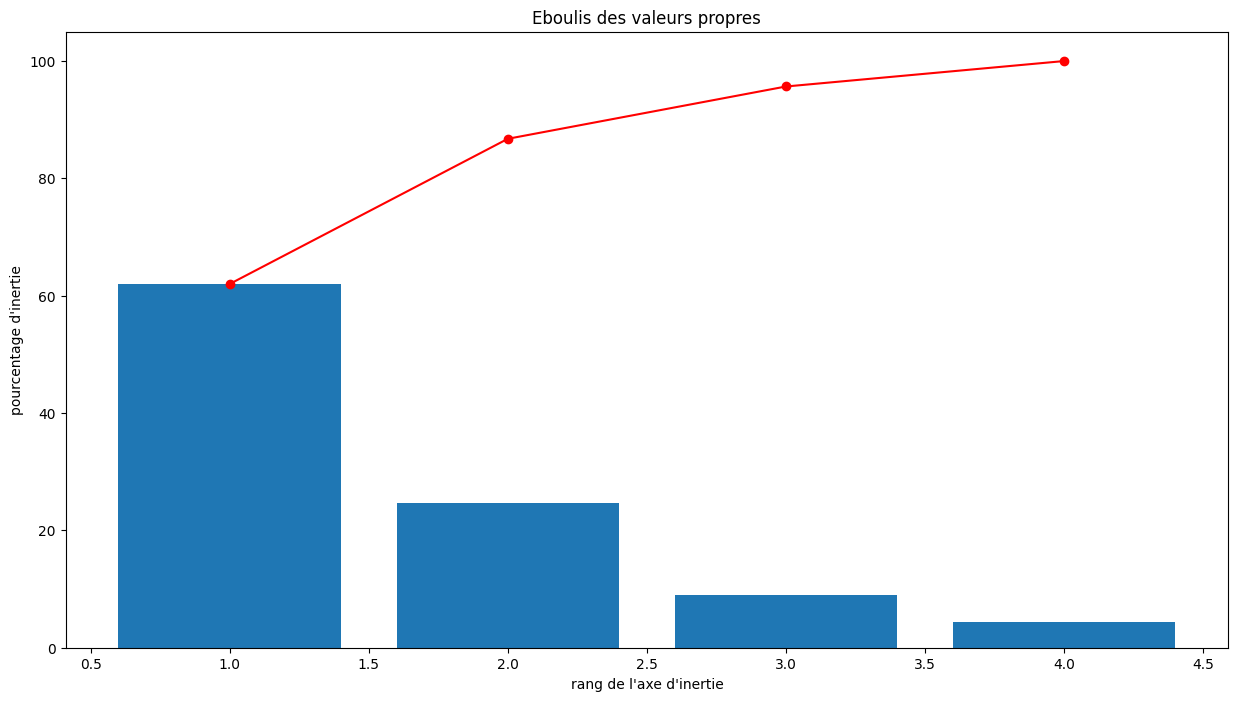

In [16]:
# choix du nombre de composantes à calculer vu qu'on a trois parametres
n_comp = 4

# Calcul des composantes principales
pca = PCA(n_components=n_comp)
pca.fit(x_scaled)
print('Nombre de composantes calculées : ', pca.n_components_)

# Eboulis des valeurs propres
plt.figure( figsize = ( 15, 8)) 
display_scree_plot(pca)

In [17]:
#appliquer l'acp pour avoir 2 composants du moment que 2 composants nous permettent d'avoir 87 de l'information
pca = PCA(n_components=2).fit(x_scaled)
Xk_projected = pca.transform(x_scaled)

<Axes: xlabel='Composante 1', ylabel='Composante 2'>

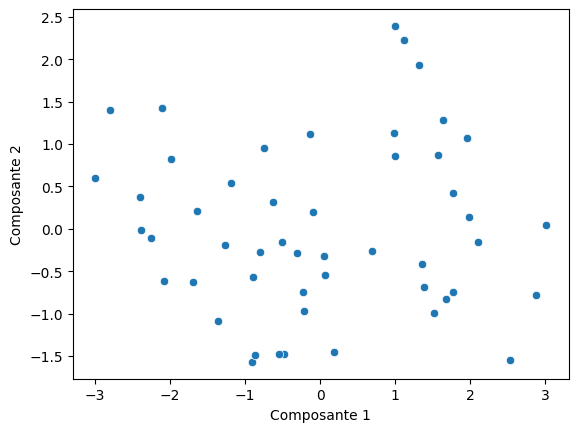

In [18]:
# Convertir Xk_projected en un DataFrame
Xk_projected_df = pd.DataFrame(Xk_projected, columns=['Composante 1', 'Composante 2'])

# Utiliser le DataFrame dans sns.scatterplot
sns.scatterplot(data=Xk_projected_df, x='Composante 1', y='Composante 2', alpha=1)


In [19]:
#cette fonction dessine le cercle de correlation (vous pouvez l'avoir facilement sur google)
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                        plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
            plt.gca().add_artist(circle)

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
            # affichage des lignes horizontales et verticales
            plt.plot([-1, 1], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-1, 1], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

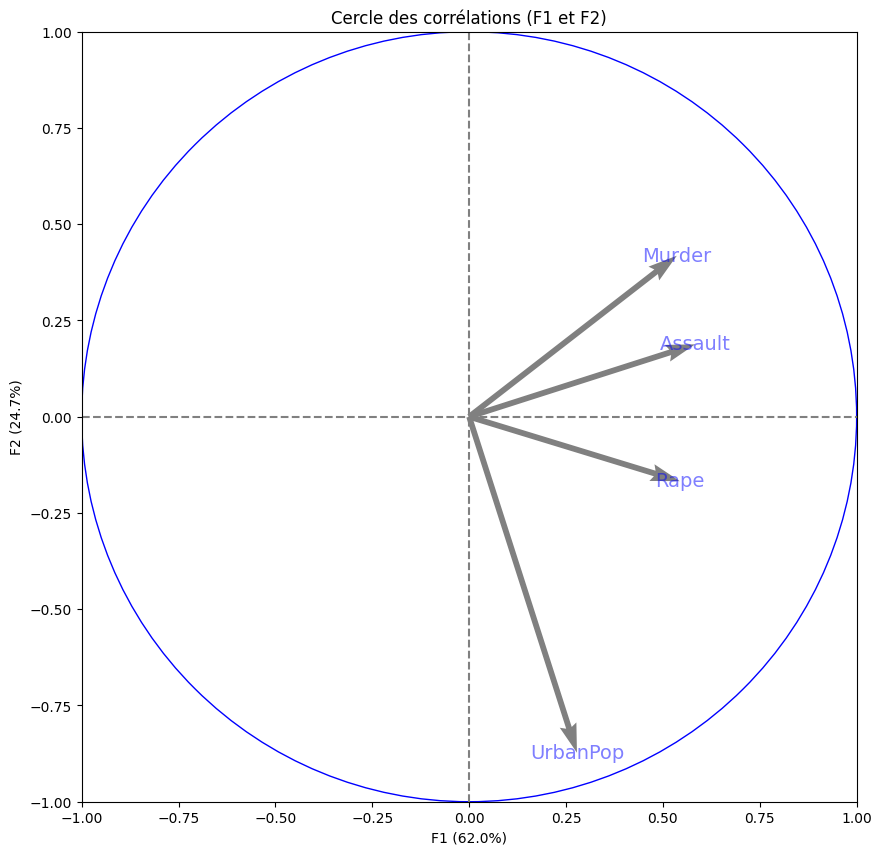

In [20]:
#utiliser la fonction display_circles() pour dessiner le cercle de correlation des deux composantes
index = df.index 
features = df.columns
choix_n_comp=2
pcs = pca.components_
display_circles(pcs, choix_n_comp, pca, [(0,1)], labels = np.array(features))

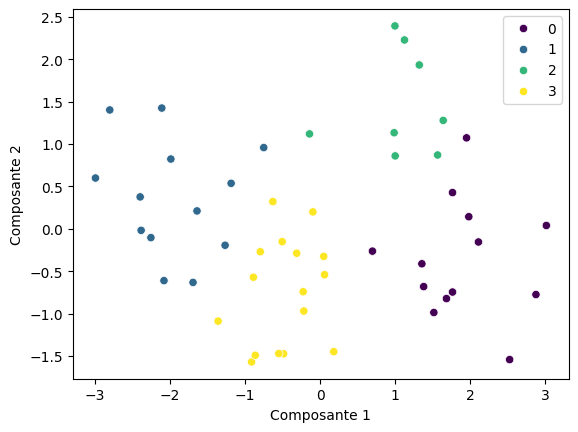

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Convertir Xk_projected en un DataFrame
Xk_projected_df = pd.DataFrame(Xk_projected, columns=['Composante 1', 'Composante 2'])

# Créer un DataFrame pour les clusters
clusters_df = pd.DataFrame(clusters, columns=['Cluster'])

# Concaténer les DataFrames Xk_projected_df et clusters_df
df = pd.concat([Xk_projected_df, clusters_df], axis=1)

# Utiliser le DataFrame df dans sns.scatterplot
sns.scatterplot(data=df, x='Composante 1', y='Composante 2', palette='viridis', alpha=1, hue='Cluster')
plt.legend()
plt.show()


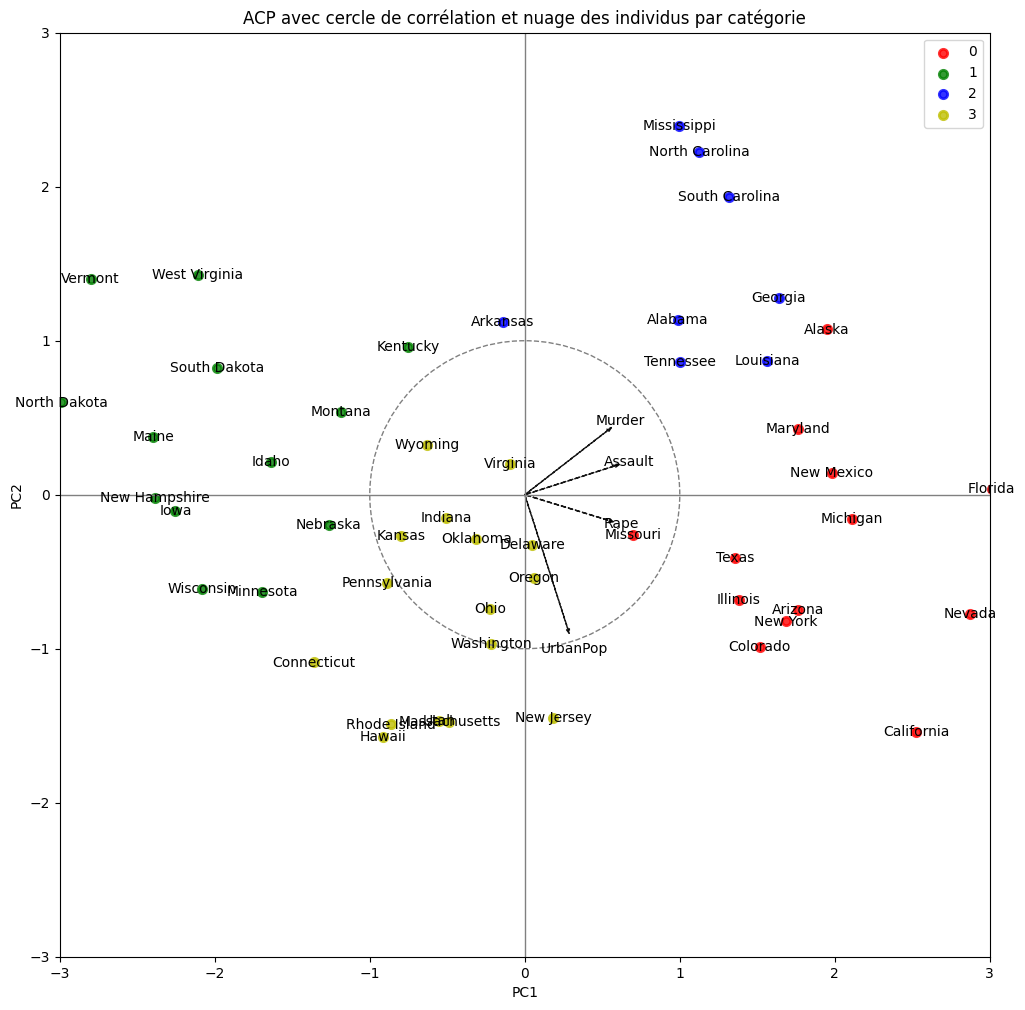

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data_dict = {
    'data': np.array(df1[['Murder', 'Assault', 'UrbanPop', 'Rape']]),  # Sélectionnez toutes les colonnes sauf la dernière
    "target": df1['cluster'].to_numpy(),  # Utilisez la colonne 'cluster' comme cibles
    "target_names": np.unique(df1['cluster']),  # Noms de vos cibles
    "feature_names": df1.columns[:-1],  # Noms de vos caractéristiques (toutes sauf la dernière)
    "DESCR": "Description de vos données (facultatif)"  # Description de vos données (facultatif)
}


# Charger les données
X = data_dict['data']
y = data_dict['target']
target_names = data_dict['target_names']
feature_names = data_dict['feature_names']

state_names = df1.index  # Les noms des États sont les index de votre DataFrame
data_dict['state_names'] = state_names

# Normaliser les données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Appliquer l'ACP
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer la figure
fig, ax = plt.subplots(figsize=(12, 12))

# Visualiser les catégories d'espèces avec les couleurs
colors = ['r', 'g', 'b', 'y']  # Mettez à jour avec vos propres couleurs si nécessaire
lw = 2

for color, i, target_name in zip(colors, [0, 1, 2, 3], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)

# Ajouter des étiquettes d'États aux points
for i in range(len(X_pca)):
    plt.text(X_pca[i, 0], X_pca[i, 1], data_dict['state_names'][i], fontsize=10, ha='center', va='center')


# Placer les vecteurs des variables
coeff = pca.components_.T  # Transposer les composantes principales
n = coeff.shape[0]

for i in range(n):
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color='k', alpha=0.9, head_width=0.02, linestyle='--')
    plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, data_dict['feature_names'][i], color='k', ha='center', va='center')

# Placer le cercle unitaire
circle = plt.Circle((0, 0), 1, color='gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

# Ajuster les limites et les axes
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.axhline(0, color='gray', linewidth=1)
plt.axvline(0, color='gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('ACP avec cercle de corrélation et nuage des individus par catégorie')

# Afficher la légende
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Afficher la figure
plt.show()